# Assignment #01 – CS7GV1: Computer Vision
**Total Marks: 10**

---

## Student Info
- **Name:**  Swetha Sekar
- **Entry Number:**  25336453

---

## Part A – Convolution (3 Points)

### Task A1 – Grayscale Convolution (2 Points)
Write your own function to compute convolution of a 2D grayscale image (`template.png`) with a 2D filter.  
- The output must be the **same size** as the input image.  
- Use **zero-padding** to handle borders.  

> Hint: Flip the kernel before applying convolution.


Grayscale Image


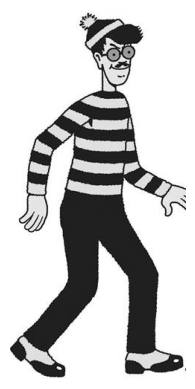




Identity filter convolution


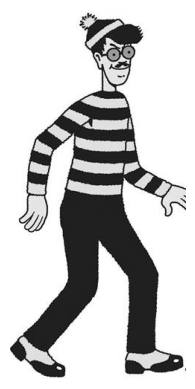




Mean filter convolution


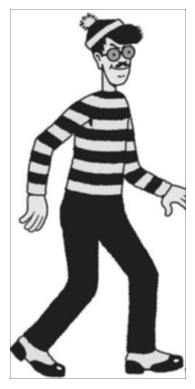




Laplacian filter convolution


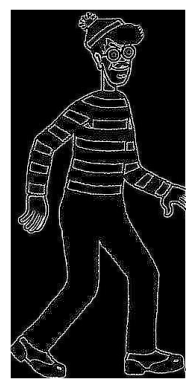

In [1]:
# Task A1 – Grayscale convolution

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def show_image(img, img_title):
  img = np.asarray(img)

  print(img_title)

  if img.ndim == 2:
      plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  else:
      plt.imshow(img)

  plt.axis('off')
  plt.show()
  print('\n\n')

def convert_to_greyscale(template_img):
  template_arr = np.asarray(template_img, dtype=np.float64)

  #slicing out the red, green and blue channels
  red = template_arr[:, :, 0]
  green = template_arr[:, :, 1]
  blue = template_arr[:, :, 2]

  #applying the grayscale conversion formula
  template_gray = 0.299 * red + 0.587 * green + 0.114 * blue

  return template_gray

def convolve_grayscale(temp_img, k_filter, padding=1):
    temp_gray = temp_img.astype(np.float64)
    kernel_filter = k_filter.astype(np.float64)

    ht, wd = temp_gray.shape
    k_ht, k_wd = kernel_filter.shape

    flipped_kernel = np.flipud(np.fliplr(kernel_filter.astype(np.float64)))

    pad_ht = k_ht // 2
    pad_wd = k_wd // 2

    #zero padding
    padded_image = np.pad(temp_gray,
                          ((pad_ht, pad_ht), (pad_wd, pad_wd)),
                          mode='constant',
                          constant_values=0)

    output = np.zeros((ht,wd), dtype=temp_gray.dtype)

    #convolution function
    for i in range(ht):
        for j in range(wd):
            window = padded_image[i : i + k_ht, j : j + k_wd]
            output[i, j] = np.sum(window * flipped_kernel)

    return output

template_img = Image.open('template.png')

template_gray = convert_to_greyscale(template_img)
show_image(template_gray, 'Grayscale Image')

identity_filter = np.array([[0,0,0],
                     [0,1,0],
                     [0,0,0]], dtype=np.float64)

mean_filter = np.ones((3,3), dtype=np.float64) / 9.0

laplacian_filter = np.array([[-1,-1,-1],
                 [-1, 8,-1],
                 [-1,-1,-1]], dtype=np.float64)

same_image = convolve_grayscale(template_gray, identity_filter)
show_image(same_image, 'Identity filter convolution')

smoothened_image = convolve_grayscale(template_gray, mean_filter)
show_image(smoothened_image, 'Mean filter convolution')

sharpened_image = convolve_grayscale(template_gray, laplacian_filter)
show_image(sharpened_image, 'Laplacian filter convolution')

##Task A1 - Explanation




*   The image is converted to numpy array to perform convolution.
*   This coloued image is converted to a grayscale image using the formula  \(Y=0.299R+0.587G+0.114B\)
*   'convolve_grayscale' method receives the image and kernel as parameters, and are converted to float64 for precise calculation
*   Size of the image and kernel are recorded and the kernel is flipped vertically and horizontally for convolution (kernel not flipped -> correlation)
*   Padding is applied so that the out put image is the same size as the input image. (applied zero padding)
*   The kernel is slid over each pixel of the input image, the kernel values are multiplied with the corresponding image pixel values, then added up; output array is returned.
* Tested this method with identity filter, mean filter and laplacian filter.







### Task A2 – RGB Convolution (1 Point)
Extend your function to handle **RGB images** using **3D filters** (filter depth = number of channels).


RGB filter


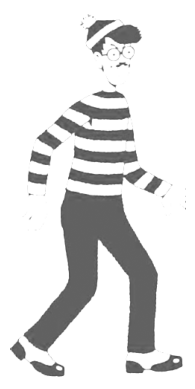




RGB Laplacian edges


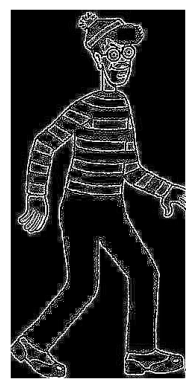

In [3]:
# Task A2 – RGB convolution

def convole_RGB(template_img, kernel_filter, padding=1):
  template_rgb = np.asarray(template_img.convert("RGB"), dtype=np.float64)

  k_height, k_width, k_channel = kernel_filter.shape
  height, width, channel = template_rgb.shape

  kernel_flipped = np.flipud(np.fliplr(kernel_filter.astype(np.float64)))

  #calculate padding size
  ph = k_height//2
  pw = k_width//2

  #((1,1), (1,1), (0, 0)) -> 1 row of pixel is added up and down, to the left and right. (0, 0) -> no changes in the channel dimension
  padded_image = np.pad(template_rgb, ((ph,ph), (pw,pw), (0, 0)),
                  mode='constant', constant_values=0)

  #calculate the size of the output image
  output_height = height + 2* ph - k_height + 1
  output_width = width  + 2* pw - k_width  + 1
  output = np.zeros((output_height, output_width), dtype=np.float64)

  for i in range(output_height):
    for j in range(output_width):
        window = padded_image[i:i+k_height, j:j+k_width, :]
        output[i, j] = np.sum(window * kernel_flipped)

  return output

kernel_rgb = mean_filter = np.ones((3,3), dtype=np.float64) / 9.0
kernel_rgb = np.dstack([kernel_rgb, kernel_rgb, kernel_rgb])
convolved_image = convole_RGB(template_img, kernel_rgb)
show_image(convolved_image, 'RGB filter')

kernel_edge = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]], dtype=np.float64)
kernel_edge = np.dstack([kernel_edge, kernel_edge, kernel_edge])

convolved_edges = convole_RGB(template_img, kernel_edge)
show_image(convolved_edges, 'RGB Laplacian edges')

##Task A2  - Explanation



*   Made sure that the input is an RGB image and dtype is changed to float64.
*   Size of the image and the kernel is captured and then the kernel is flipped for convolution.
*   Input is padded with zeros
*   The kernel is slid over each pixel of the input image, the kernel values are multiplied with the corresponding image pixel values, then added up; output array is returned.   
*   Used mean filter and laplacian filter to display the output image








## Part B – Gaussian Filtering (1 Point)

- Apply a **Gaussian filter** with σ = 1 on `waldo.png`.  
- You can use **built-in functions** for convolution here.  
- Display the smoothed result.


Grayscale image without Gaussian filter


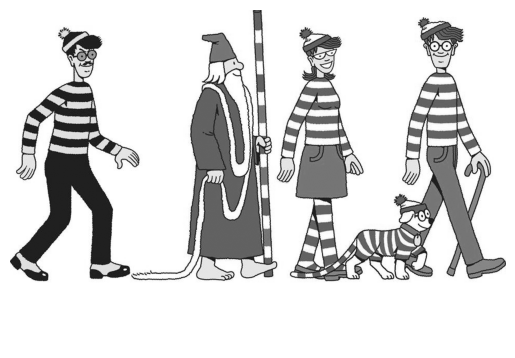




After Gaussian filter


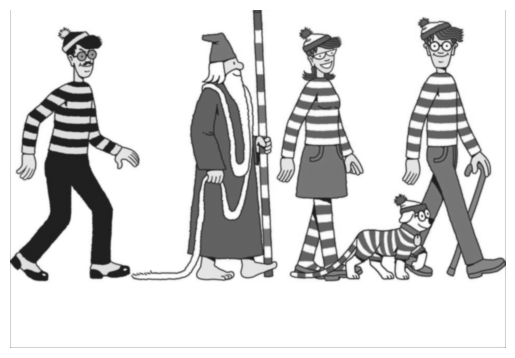

In [ ]:
# Task B – Gaussian smoothing

def create_gaussian_kernel(k_size, sigma=1.0):
  mid = k_size // 2
  y, x = np.mgrid[-mid:mid+1, -mid:mid+1]
  g_kernel = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
  norm_g_kernel = g_kernel / np.sum(g_kernel)

  return norm_g_kernel

def generate_gaussian_filtered_img(img):
  kernel = create_gaussian_kernel(15)
  return convolve_grayscale(img, kernel)

waldo_img = Image.open('waldo.png')
waldo_gray = convert_to_greyscale(waldo_img)
result = generate_gaussian_filtered_img(waldo_gray)

show_image(waldo_gray, 'Grayscale image without Gaussian filter')
show_image(result, 'After Gaussian filter')


##Part B Explanation



*   The mid point of the kernel is calculated, to create a mesh grid with origin(0,0) as the centre
*   2D array of x and y is created of size [k_size, k_size]
*   Gaussian formula is applied over this array and then normalized to avoid the intrusion of light in the image
*   The image is convolved with this gaussian filter, and as a result, the output is blurred but the still, the edges are preserved.






## Part C – Gradient Magnitude (1 Point)

- Compute the **magnitude of image gradients** for:
  - `waldo.png`
  - `template.png`
- Use **Sobel operators** for gradient calculation.


In [4]:
# Task C – Gradient magnitude
def find_gradient_magnitude(gray_img):
  sobel_y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float64)

  sobel_x = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]], dtype=np.float64)

  conv_x = convolve_grayscale(gray_img, sobel_x)
  conv_y = convolve_grayscale(gray_img, sobel_y)

  magnitude = np.hypot(conv_x, conv_y)
  return magnitude

images = ['template.png', 'waldo.png']

for i in images:
  img = Image.open(i)
  gray_img = convert_to_greyscale(img)
  print(f"Magnitude of image ({i}) gradient using Sobel operator: {find_gradient_magnitude(gray_img)}")


Magnitude of image (template.png) gradient using Sobel operator: [[1081.87337522 1020.         1020.         ... 1020.
  1020.         1081.87337522]
 [1020.            0.            0.         ...    0.
     0.         1020.        ]
 [1020.            0.            0.         ...    0.
     0.         1020.        ]
 ...
 [1020.            0.            0.         ...    5.65685425
    25.49509757 1012.04940591]
 [1020.            0.            0.         ...   19.23538406
    10.77032961 1009.08374281]
 [1081.87337522 1020.         1020.         ... 1020.15881117
  1020.07058579 1069.22121191]]
Magnitude of image (waldo.png) gradient using Sobel operator: [[1081.87337522 1020.         1020.         ... 1020.
  1020.         1081.87337522]
 [1020.            0.            0.         ...    0.
     0.         1020.        ]
 [1020.            0.            0.         ...    0.
     0.         1020.        ]
 ...
 [1020.            0.            0.         ...    0.
     0.         102

##Part C - Explanation



*   Sobel kernels are basically used to find the change in intensity in the images, basically the edges.
*  sobel_y -> this kernel helps in finding the rate of change of intensity in the vertical direction
*   sobel_x -> this kernel helps in finding the rate of change of intensity in the horizontal direction
*  The image is then convolved veritcally and horizontally with respective sobel kernels.
*   The magnitude is calculated using np.hypot, woth this underlying formula: sqrt((conv_x)^2 + (conv_y)^2)







## Part D – Custom Canny Edge Detector (4 Points)

Implement your own function:

```python
def MyCannyEdgeDetector(image, low_threshold, high_threshold):
    # returns binary edge-detected image


Steps to implement:

Gaussian Smoothing – reduce noise

Gradient Calculation – compute magnitude & direction

Non-Maximum Suppression – thin out edges

Hysteresis Thresholding – classify strong/weak edges and track connectivity

⚠️ Do not use cv2.Canny() in your implementation.

Explain each step briefly in Markdown before your code.

Before canny edge detection


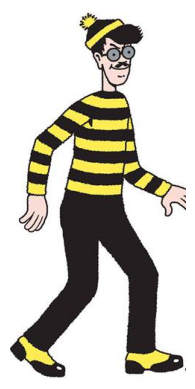




After canny edge detection


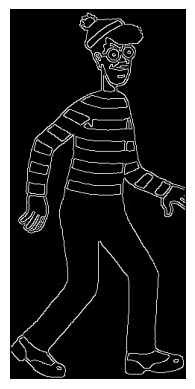




Before canny edge detection


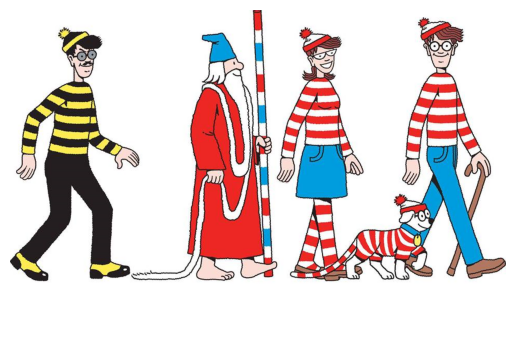




After canny edge detection


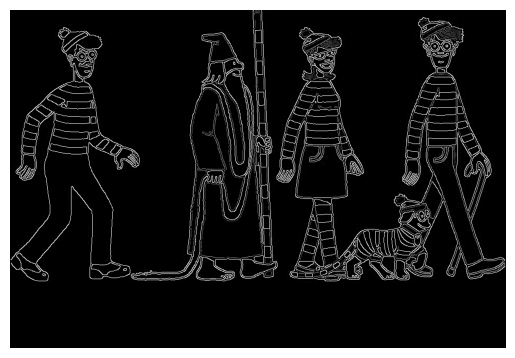

In [15]:

# Task D – Custom Canny Edge Detector

#convert image to grayscale
def convert_greyscale(image):
  img_arr = np.asarray(image, dtype=np.float64)

  if img_arr.ndim == 2:
      return img_arr.copy()

  red = img_arr[:, :, 0]
  green = img_arr[:, :, 1]
  blue = img_arr[:, :, 2]
  template_gray = 0.299 * red + 0.587 * green + 0.114 * blue

  return template_gray

#apply 2D convolution, kernel: gaussian
def convolve_2D(temp_img, k_filter, padding=1):
    temp_gray = temp_img.astype(np.float64)
    kernel_filter = k_filter.astype(np.float64)

    ht, wd = temp_gray.shape
    k_ht, k_wd = kernel_filter.shape

    #kernel is flipped to perform convolution
    flipped_kernel = np.flip(kernel_filter, axis=(0, 1))

    #calculate the padding size (floor division), eg: 3//2 == 1, 5//2 = 2 etc.
    pad_ht = k_ht // 2
    pad_wd = k_wd // 2

    #apply zer padding
    padded_image = np.pad(temp_gray,
                          ((pad_ht, pad_ht), (pad_wd, pad_wd)),
                          mode='constant',
                          constant_values=0)

    output = np.zeros((ht,wd), dtype=temp_gray.dtype)

    #convolution
    for i in range(ht):
        for j in range(wd):
            window = padded_image[i : i + k_ht, j : j + k_wd]
            output[i, j] = np.sum(window * flipped_kernel)

    return output

#create gaussian filter:
def create_gaussian_filtered_image(img, k_size, sigma=1.0):

  #calculate the mid point
  mid = k_size // 2

  #create a square grid(numpy meshgrid) centred at origin.
  y, x = np.mgrid[-mid:mid+1, -mid:mid+1]

  #apply gaussian formula and normalize it
  g_kernel = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
  norm_g_kernel = g_kernel / np.sum(g_kernel)

  return convolve_2D(img, norm_g_kernel)

#find magnitude and direction of image gradient
def find_gradient_magnitude(gray_img):

  #sobel kernels to detect edges
  sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float64)

  sobel_y = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]], dtype=np.float64)

  conv_x = convolve_grayscale(gray_img, sobel_x)
  conv_y = convolve_grayscale(gray_img, sobel_y)

  #find the direct and magnitude using numpy
  magnitude = np.hypot(conv_x, conv_y)
  direction = np.arctan2(conv_y, conv_x) * (180 / np.pi)
  return magnitude, direction

#execute non-maximum supression
def non_maximum_supression(mag, dir):

  #create an array of the same shape as magnitude, to fill in the values which survives non-maximum supression, the rest are left as zero.
  #this way, local extrema is detected
  ht, wd = mag.shape
  z = np.zeros_like(mag, dtype=np.float64)

  #it shifts the direction to lie in the range -180º to 180º
  angle = (dir + 180.0) % 180.0

  for i in range(1,ht-1):
      for j in range(1,wd-1):
          q = p = 0.0
          a = angle[i, j]
          m = mag[i, j]

          if (0 <= a < 22.5) or (157.5 <= a < 180):     # 0°
              #if the angle is horizontal, the compare the magnitude of left/right neighbours
              q, p = mag[i, j+1], mag[i, j-1]
          elif 22.5 <= a < 67.5:                        # 45°
              #if the angle is diagonal, the compare the magnitude of the respective diagonal neighbours
              q, p = mag[i+1, j-1], mag[i-1, j+1]
          elif 67.5 <= a < 112.5:                       # 90°
              #if the angle is vertical, the compare the magnitude of up/down neighbours
              q, p = mag[i+1, j], mag[i-1, j]
          else:                                         # 135°
              #if the angle is diagonal, the compare the magnitude of the respective diagonal neighbours
              q, p = mag[i-1, j-1], mag[i+1, j+1]

          #if the calculated magnitude is greater than both the neighbours, it is updated in the corresponding position in all zeroes array; else it is left as zero
          if m >= q and m >= p:
              z[i, j] = m
  return z

#hysteresis thresholding
def hysteresis_thresholding(nms_img, low_threshold, high_threshold):

  #consider the highest and lowest fraction of the maximum NMS value
  high = nms_img.max() * high_threshold
  low = nms_img.max() * low_threshold

  ht, wd = nms_img.shape
  result = np.zeros((ht,wd), dtype = np.int32)

  #just a temporary tag used to specify strong and weak intensities
  weak, strong = 10, 255

  #classify strong and weak edges
  strong_i, strong_j = np.where(nms_img >= high)
  weak_i, weak_j = np.where((nms_img >= low) & (nms_img < high))
  zeros_i, zeros_j = np.where(nms_img < low)

  result[strong_i, strong_j] = strong
  result[weak_i, weak_j] = weak

  #if an edge is weak, check if the neighbour value corresponds to a strong or a weak edge
  #if yes, retain it as an edge, else make it zero
  for i in range(1, ht-1):
      for j in range(1, wd-1):
          if nms_img[i,j] == weak:
              if nms_img[i,j-1] == strong or nms_img[i][j+1] == strong or nms_img[i-1][j-1] == strong or nms_img[i-1][j] == strong or nms_img[i-1][j+1] == strong or nms_img[i+1][j-1] == strong or nms_img[i+1][j] == strong or nms_img[i+1][j+1] == strong:
                  nms_img[i,j] = strong
              else:
                  nms_img[i,j] = 0

  return nms_img

def MyCannyEdgeDetector(image, low_threshold, high_threshold, kernel_size, sigma):
  g_img = convert_greyscale(image)
  smoothened_img = create_gaussian_filtered_image(g_img, kernel_size, sigma)
  magnitude, direction = find_gradient_magnitude(smoothened_img)
  img_after_nms = non_maximum_supression(magnitude, direction)
  result = hysteresis_thresholding(img_after_nms, low_threshold, high_threshold)

  return result


images = ['template.png', 'waldo.png']

for i in images:
  img = Image.open(i)
  show_image(img, 'Before canny edge detection')

  canny_edge_detected_img = MyCannyEdgeDetector(img, 50, 150, 7, 1)
  show_image(canny_edge_detected_img, 'After canny edge detection')



##Part D - Explanation



*   The image is first converted to grayscale.
*   The image is convolved using Gaussian filter(similar to Part B)
*   Sobel X,Y is applied to find the magnitude and direction of the change in intensity.
*   Non-maximum supression is applied to thin out the edges, along the direction which is calculated using the sobel filters
*   Hysteresis thresholding is carried to detect the strong and weak edges; weak edges which are connected to another strong/weak is promoted as edge.
*  The resultant images show the edges




## Part E – SSIM Similarity (1 Point)

- Compare your custom Canny output with the built-in OpenCV Canny edge detector.  
- Use **SSIM (Structural Similarity Index)** to measure similarity.  
- Report the SSIM score.


SSIM score: 0.8286
Custom Canny Edge Detection


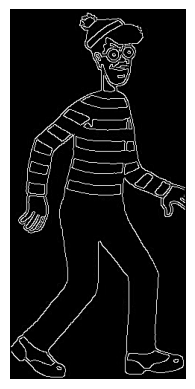




CV2 Canny Edge Detection


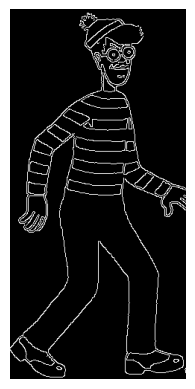

In [14]:
# Task E – SSIM Comparison

import cv2
from skimage.metrics import structural_similarity as ssim

path = 'template.png'
img = Image.open(path)

low_threshold = 50
high_threshold = 150
kernel_size = 17
sigma = 1.0

#custom canny edge detection
custom_canny = MyCannyEdgeDetector(img, low_threshold, high_threshold, kernel_size, sigma)

#cv2 canny edge detection
gray_cv2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
cv2_canny = cv2.Canny(gray_cv2, low_threshold, high_threshold, L2gradient=True)

#similarity index SSIM
#data_range -> intensity span
similarity_index = ssim(custom_canny, cv2_canny, data_range=255)

print(f"SSIM score: {similarity_index:.4f}")

show_image(custom_canny, "Custom Canny Edge Detection")
show_image(cv2_canny, "CV2 Canny Edge Detection")



##Part E - Explanation



*   Low and high thresholds, kernel size, sigma value are specified
*   Edges are detected using both 'MyCannyEdgeDetector' and opencv's 'cv2.Canny' methods.
*  SSIM is calculated, which tells us the structural similarity between both the outputs.
*  ssim is imported from skimage.metrics, and it requires two equally sized arrays(custom_canny, cv2_canny) in this case, data range(intensity span) as input parameters
*   In this code, the outputs from both the images are 82.86% similar










## Submission
- Complete this notebook fully (code + explanations + outputs).  
- Submit ONLY this file:  
  `Assignment_01_entrynumber.ipynb`  
- Do NOT modify the provided images.  
- A plagiarism check will be applied.

